# Financial data ananysis with Pandas and Yfinance

## comparing stocks

In [21]:
# Import lirbaries
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override() 

import seaborn as sns
sns.set()

### Import stocks

Recently I've been investing in US stocks market, I was investing in penny stocks which made me lose lot of money...
So I've decided to invest in stock index. Let's find out which way is better to invest in S&P 500 or US total stock market.

In [3]:
# Load data 
splg = pdr.get_data_yahoo('SPLG', start = '2015-01-01') # S&P 500
itot = pdr.get_data_yahoo('ITOT', start = '2015-01-01') # US total stock market

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
splg.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,24.434999,24.434999,24.209999,24.209999,21.434902,5200
2015-01-02,24.030001,24.202499,24.017500,24.162500,21.392845,2400
2015-01-05,23.892500,23.897499,23.687500,23.687500,20.972286,8000
2015-01-06,23.745001,23.745001,23.402500,23.402500,20.719957,5200
2015-01-07,23.677500,23.787500,23.667500,23.787500,21.060829,6000


In [12]:
itot.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,47.625000,47.625000,46.900002,46.945000,41.732368,204200
2015-01-02,47.244999,47.244999,46.615002,46.904999,41.696823,308200
2015-01-05,46.575001,46.580002,45.990002,46.064999,40.950092,2337000
2015-01-06,46.150002,46.250000,45.384998,45.645000,40.576721,668800
2015-01-07,45.980000,46.200001,45.849998,46.160000,41.034542,498600


In [14]:
# drop Volume
splg_tmp = splg.drop(columns='Volume')
itot_tmp = itot.drop(columns='Volume')

In [17]:
splg.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Plot data

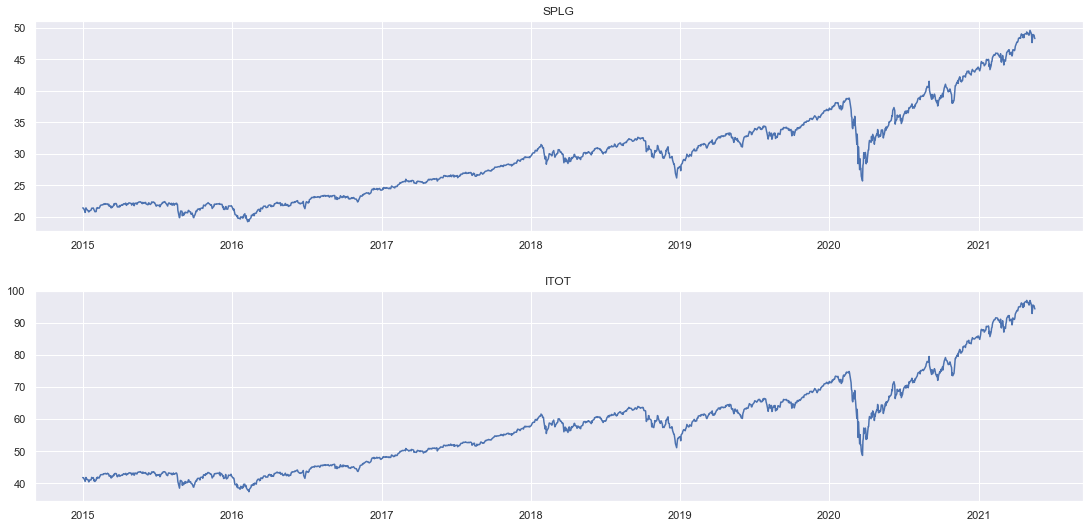

In [41]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
fig.tight_layout(pad=3.0)

ax1.plot(splg.index, splg['Adj Close'])
ax2.plot(itot.index, itot['Adj Close'])


ax1.set_title('SPLG')
ax2.set_title('ITOT')
plt.show()

They look very same to my eyes, however if you look at the yaxis, pricing is different between SPLG and ITOT. We can't say easily if those have same profit. Let's calculate daily percentage change to see.

### Daily percentage change

In [52]:
def daily_percent_change(ticker):
    dpc = ((ticker['Adj Close'] / ticker['Adj Close'].shift(1) -1) *100)
    dpc.iloc[0] = 0
    return dpc

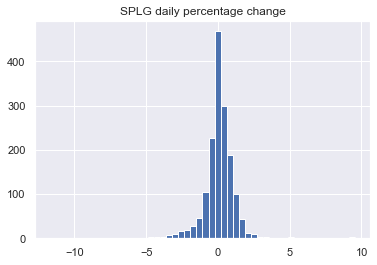

In [69]:
splg_dpc = daily_percent_change(splg)
plt.hist(splg_dpc, bins=50)
plt.grid(True)
plt.title("SPLG daily percentage change")
plt.show()

In [66]:
splg_dpc.describe()

count    1607.000000
mean        0.057334
std         1.157786
min       -11.676088
25%        -0.334321
50%         0.069987
75%         0.559011
max         9.525633
Name: Adj Close, dtype: float64

### Cumulative sum

DPC is daily percentage change, if want to see total changes we need to calculate cumulative sum.

`cumsum()` is a sequence of partial sums of a given data set. It is used to show the summation of data as it grows with time.

In [74]:
# Calculate cumulative sum
splg_dpc_cs = daily_percent_change(splg)
itot_dpc_cs = daily_percent_change(itot)

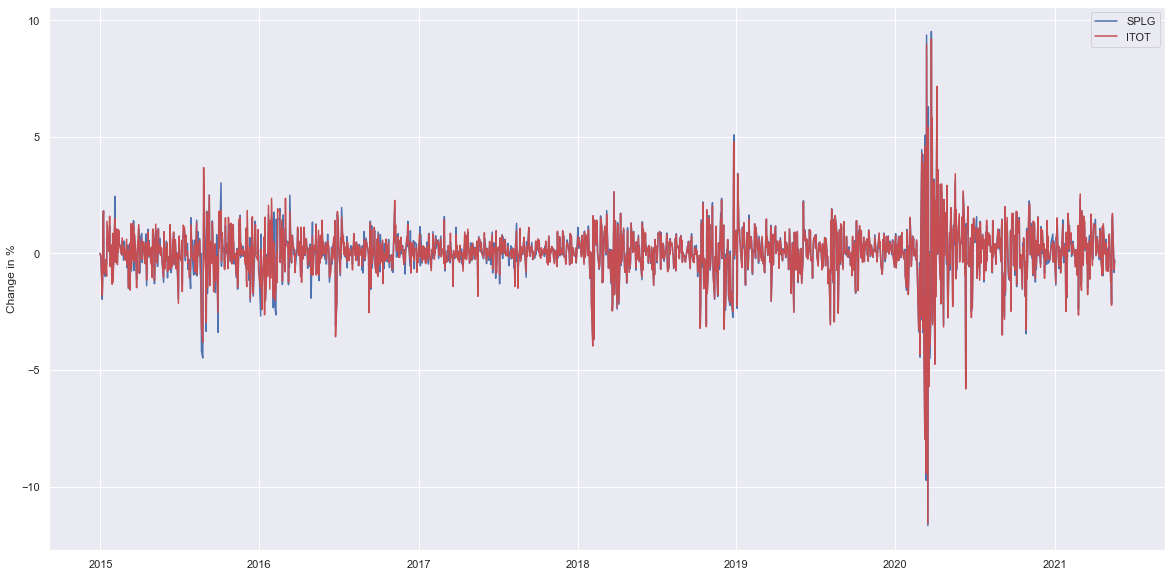

In [88]:
# Plot data

plt.figure(figsize=(20, 10))
plt.plot(splg.index, splg_dpc_cs, 'b', label='SPLG')
plt.plot(itot.index, itot_dpc_cs, 'r', label='ITOT')
plt.ylabel('Change in %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [107]:
import numpy as np
np.abs(np.median(np.nan_to_num((splg_dpc_cs - itot_dpc_cs)/(splg_dpc_cs + itot_dpc_cs))))

0.0023953878921712155

In [108]:
np.mean(np.abs(splg_dpc_cs - itot_dpc_cs))

0.16135845698760307

In [109]:
sum(i - j for i, j in zip(splg_dpc_cs, itot_dpc_cs)) / len(splg_dpc_cs)

-0.00020669318526613382

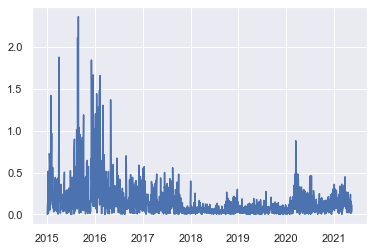

In [110]:
plt.plot(np.abs(splg_dpc_cs - itot_dpc_cs))